In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('E:/Flip Robo/projects/stock-project/stock project/Company Stock and Investment.csv')

In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'],dayfirst=True)

In [4]:
datacopy=dataset

In [5]:
dataset.set_index('Date',inplace=True)

In [6]:
dataset.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-01-04,0.026830,0.001097,0.015565,-0.004609
2010-01-05,0.002699,0.001560,0.001729,0.005900
2010-01-06,0.021688,0.006009,-0.015906,-0.018116
2010-01-07,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
data=dataset.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [8]:
data.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-01-04,0.026830
2010-01-05,0.002699
2010-01-06,0.021688
2010-01-07,-0.006256


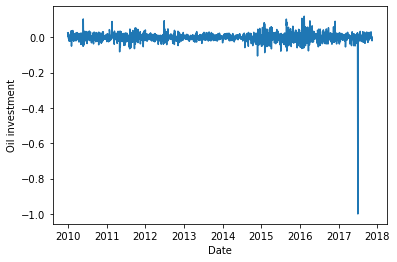

In [9]:
plt.xlabel('Date')
plt.ylabel('Oil investment')
plt.plot(data)

In [10]:
data=data.asfreq('D',method='pad')

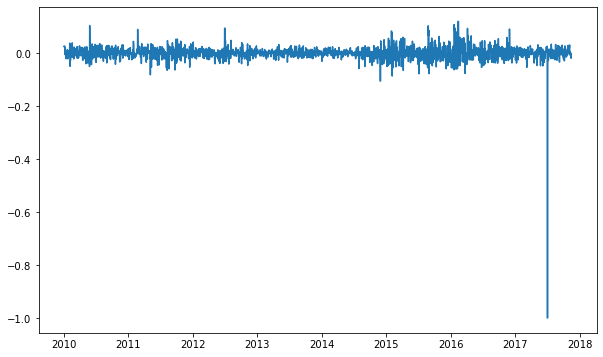

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data)


In [12]:
data.describe()

,Oil Investments
count,2877.000000
mean,-0.000532
std,0.033754
min,-1.000000
25%,-0.011118
50%,0.000399
75%,0.010648
max,0.119511


In [13]:
data['2017':'2018']

,Oil Investments
Date,
2017-01-01,-0.000929
2017-01-02,-0.000929
2017-01-03,-0.025860
2017-01-04,0.017189
2017-01-05,0.009576
...,...
2017-11-11,-0.007173
2017-11-12,-0.007173
2017-11-13,0.000352


In [14]:
start_date = datetime(2009,12,31)
end_date = datetime(2017,6,30)

In [15]:
data=data[start_date:end_date]

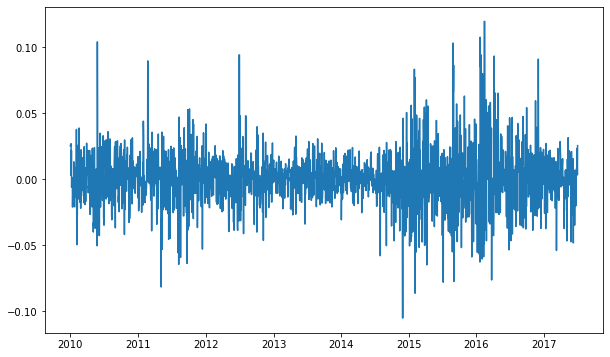

In [16]:
plt.figure(figsize=(10,6))
plt.plot(data)

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(data)

In [19]:

print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-24.106298856530188, 0.0, 3, 2735, {'1%': -3.4327432168541914, '5%': -2.862597350432621, '10%': -2.5673328618123117}, -13381.740656568167)


In [20]:
data['First Difference'] = data['Oil Investments'] - data['Oil Investments'].shift(1)

In [21]:
data['Oil Investments'].shift(1).head()

Date
2009-12-31         NaN
2010-01-01    0.025417
2010-01-02    0.025417
2010-01-03    0.025417
2010-01-04    0.025417
Freq: D, Name: Oil Investments, dtype: float64

In [22]:
data['Seasonal First Difference']=data['Oil Investments']-data['Oil Investments'].shift(365) 

In [23]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data1):
    result=adfuller(data1) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [24]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -17.440049159911226
p-value : 4.7148694422513786e-30
#Lags Used : 8
Number of Observations Used : 2365
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


As plot shows constant values over time and no specific trend or seasonal representation, so the forecasting cannot be done.

In [25]:
data=dataset.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [26]:
data.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-04,0.001097
2010-01-05,0.001560
2010-01-06,0.006009
2010-01-07,0.000221


In [27]:
dataset=pd.read_csv('E:/Flip Robo/projects/stock-project/stock project/Company Stock and Investment.csv')

In [28]:
dataset['Date']=pd.to_datetime(dataset['Date'],dayfirst=True)

In [29]:
datacopy=dataset

In [30]:
datacopy.Date=datacopy['Date'].apply(lambda x:x.strftime('%Y-%m'))

In [31]:
datacopy.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12,0.025417,0.000150,0.017354,0.006848
1,2010-01,0.026830,0.001097,0.015565,-0.004609
2,2010-01,0.002699,0.001560,0.001729,0.005900
3,2010-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-01,-0.006256,0.000221,-0.001849,-0.017013


In [32]:
data=datacopy.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [33]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [34]:
data.Date

0      2009-12-01
1      2010-01-01
2      2010-01-01
3      2010-01-01
4      2010-01-01
          ...    
1979   2017-11-01
1980   2017-11-01
1981   2017-11-01
1982   2017-11-01
1983   2017-11-01
Name: Date, Length: 1984, dtype: datetime64[ns]

In [35]:
data.set_index('Date',inplace=True)

In [36]:
data=data.resample('M').mean()

In [37]:
data.tail()

,Gold Investments
Date,
2017-07-31,0.001025
2017-08-31,-0.086243
2017-09-30,-0.001084
2017-10-31,-0.000442
2017-11-30,0.000870


In [38]:
data.describe()

,Gold Investments
count,96.000000
mean,-0.019533
std,0.031323
min,-0.102125
25%,-0.045374
50%,-0.001376
75%,0.000874
max,0.005398


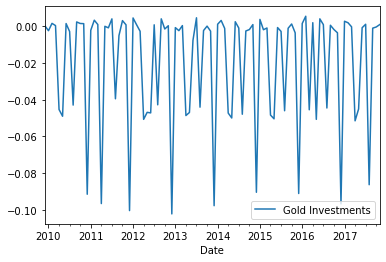

In [39]:
data.plot()

In [40]:
adfuller_test(data)

ADF Test Statistic : -4.107779557995698
p-value : 0.0009402414309088313
#Lags Used : 11
Number of Observations Used : 84
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


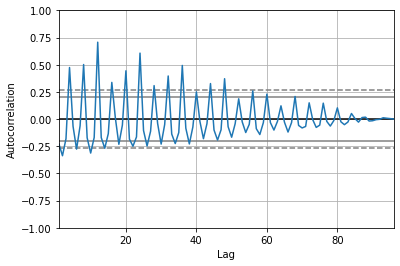

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

In [42]:
x_train,y_train=data[0:72],data[72:]

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

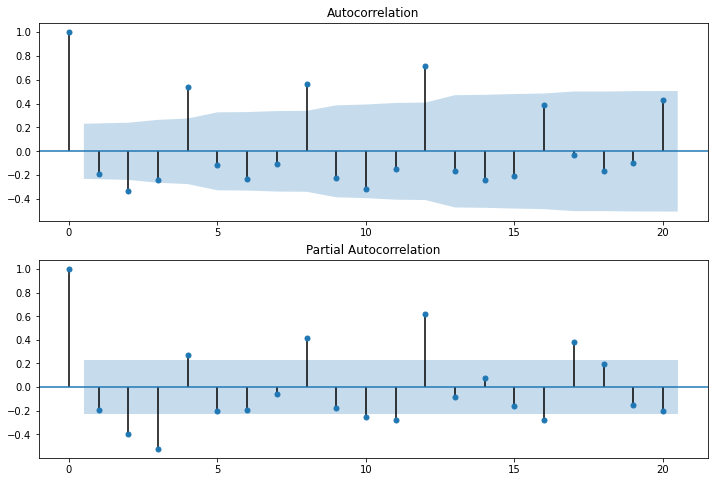

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = plot_acf(x_train,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train,lags=20,ax=ax2)

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

[]

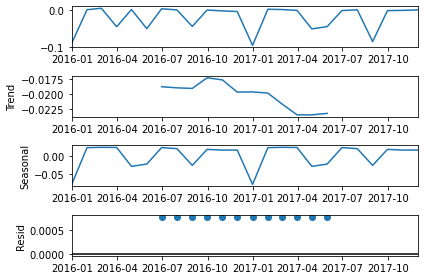

In [46]:
ts_decompose=seasonal_decompose(y_train,model='additive')
ts_decompose.plot()
plt.plot()

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
model=ARIMA(data,order=(1,0,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Gold Investments   No. Observations:                   96
Model:                     ARMA(1, 1)   Log Likelihood                 213.976
Method:                       css-mle   S.D. of innovations              0.026
Date:                Sat, 31 Oct 2020   AIC                           -419.952
Time:                        13:52:26   BIC                           -409.694
Sample:                    12-31-2009   HQIC                          -415.805
                         - 11-30-2017                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0202      0.000    -47.418      0.000      -0.021      -0.019
ar.L1.Gold Investments     0.2276      0.131      1.737      0.082      -0.029       0.484
ma.L1.Gold Investments    -0.8904      0.078    -11.472      0.000      -1.043      -0.738
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.3937           +0.0000j            4.3937            0.0000
MA.1            1.1230           +0.0000j            1.1230            0.0000
-----------------------------------------------------------------------------
"""

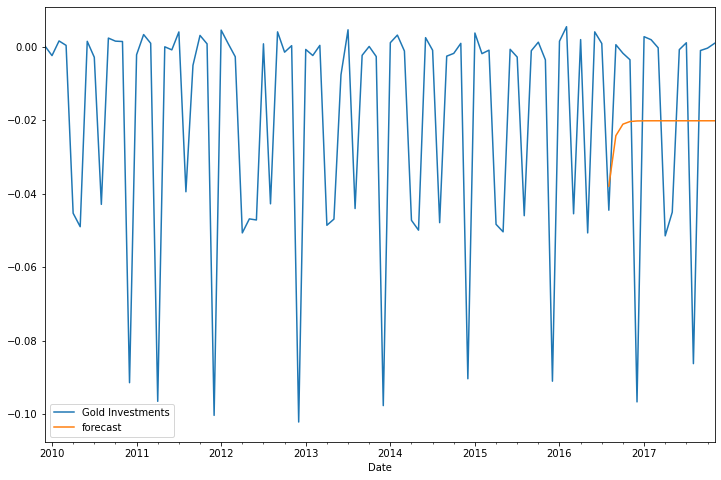

In [50]:
data['forecast']=model_fit.predict(start=80,end=96,dynamic=True)
data[['Gold Investments','forecast']].plot(figsize=(12,8))

In [51]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [52]:
model=sm.tsa.statespace.SARIMAX(x_train,order=(1, 1, 0),seasonal_order=(1,1,0,12)) #(p,d,q,Shift)
results=model.fit()

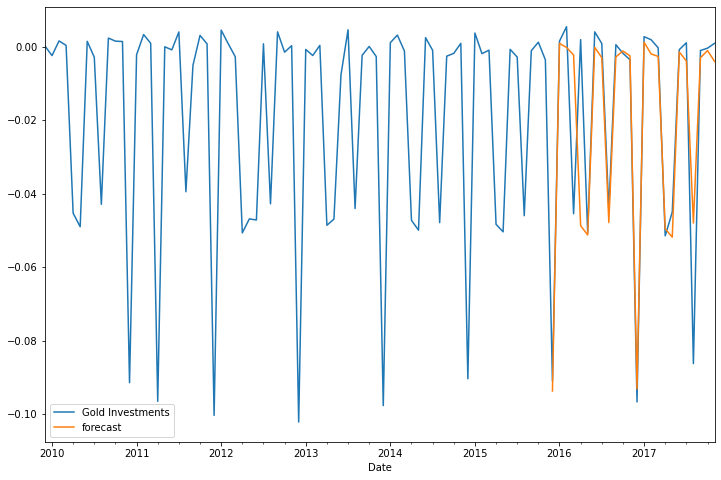

In [53]:
data['forecast']=results.predict(start=72,end=96,dynamic=True)
data[['Gold Investments','forecast']].plot(figsize=(12,8))

In [54]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [56]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [57]:
future_datest_df.tail()

,Gold Investments,forecast
2019-06-30,NaN,NaN
2019-07-30,NaN,NaN
2019-08-30,NaN,NaN
2019-09-30,NaN,NaN
2019-10-30,NaN,NaN


In [58]:
future_df=pd.concat([data,future_datest_df])

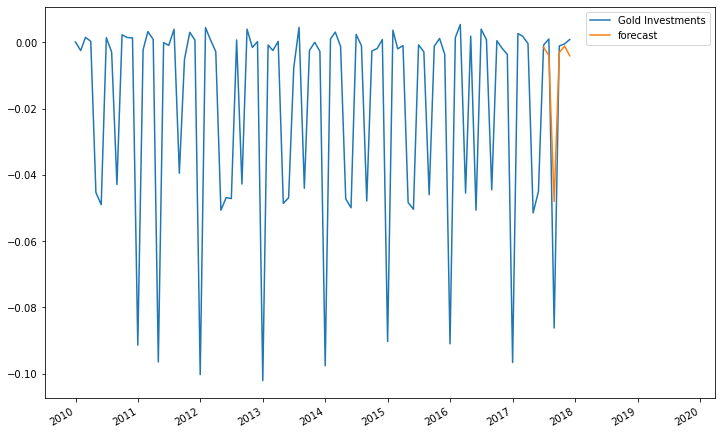

In [59]:
future_df['forecast'] = results.predict(start = 90, end = 120, dynamic= True)  
future_df[['Gold Investments', 'forecast']].plot(figsize=(12, 8)) 

In [60]:
dataset=pd.read_csv('E:/Flip Robo/projects/stock-project/stock project/Company Stock and Investment.csv')

In [61]:
dataset['Date']=pd.to_datetime(dataset['Date'],dayfirst=True)

In [62]:
datacopy=dataset

In [63]:
datacopy.Date=datacopy['Date'].apply(lambda x:x.strftime('%Y-%m'))

In [64]:
data=datacopy.drop(['Oil Investments','Gold Investments','Other sharesInvestments'],axis=1)

In [65]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [66]:
data.set_index('Date',inplace=True)

In [67]:
data=data.resample('M').mean()

In [68]:
data.tail()

,Comp Stock
Date,
2017-07-31,0.001640
2017-08-31,0.004368
2017-09-30,-0.003051
2017-10-31,0.004275
2017-11-30,0.000092


In [69]:
data.describe()

,Comp Stock
count,96.000000
mean,0.001162
std,0.003704
min,-0.006997
25%,-0.000842
50%,0.000888
75%,0.003277
max,0.017354


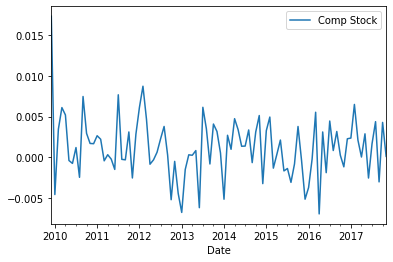

In [70]:
data.plot()

In [71]:
adfuller_test(data)

ADF Test Statistic : -11.257176132464247
p-value : 1.6560213346906978e-20
#Lags Used : 0
Number of Observations Used : 95
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


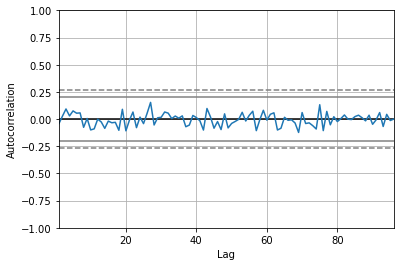

In [72]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

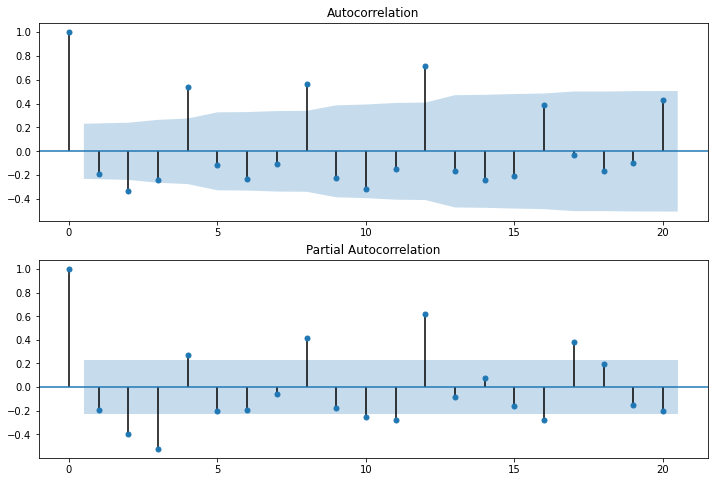

In [73]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = plot_acf(x_train,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train,lags=20,ax=ax2)

In [74]:
model=ARIMA(data,order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                   95
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 380.382
Method:                       css-mle   S.D. of innovations              0.004
Date:                Sat, 31 Oct 2020   AIC                           -754.764
Time:                        13:52:49   BIC                           -747.102
Sample:                    01-31-2010   HQIC                          -751.668
                         - 11-30-2017                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.484e-05      0.000     -0.289      0.772      -0.001       0.000
ar.L1.D.Comp Stock    -0.5485      0.098     -5.570      0.000      -0.742      -0.356
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8230           +0.0000j            1.8230            0.5000
-----------------------------------------------------------------------------
"""

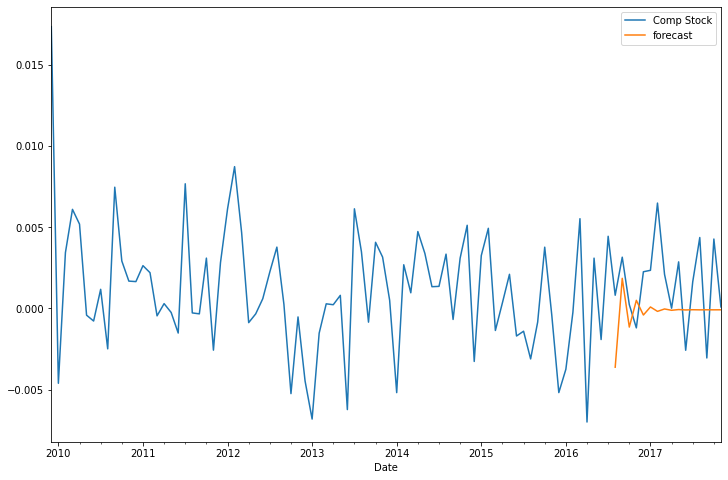

In [76]:
data['forecast']=model_fit.predict(start=80,end=96,dynamic=True)
data[['Comp Stock','forecast']].plot(figsize=(12,8))

In [77]:
model=sm.tsa.statespace.SARIMAX(x_train,order=(1, 0,1),seasonal_order=(1,0,1,12)) #(p,d,q,Shift)
results=model.fit()

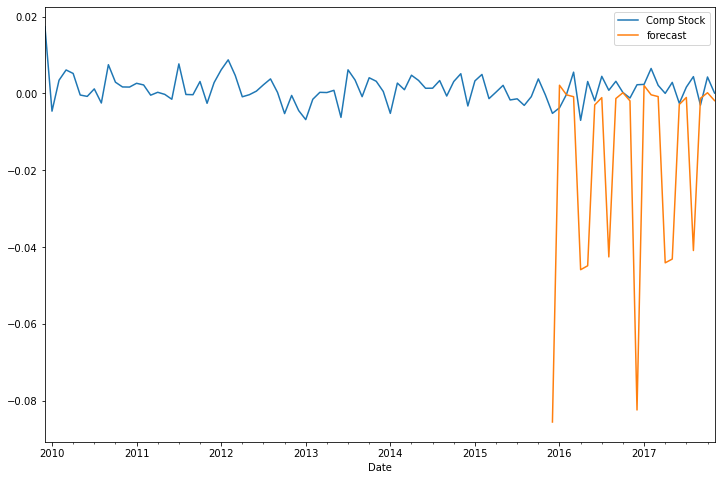

In [78]:
data['forecast']=results.predict(start=72,end=96,dynamic=True)
data[['Comp Stock','forecast']].plot(figsize=(12,8))

In [79]:
dataset=pd.read_csv('E:/Flip Robo/projects/stock-project/stock project/Company Stock and Investment.csv')

In [80]:
dataset['Date']=pd.to_datetime(dataset['Date'],dayfirst=True)

In [81]:
datacopy=dataset

In [82]:
datacopy.Date=datacopy['Date'].apply(lambda x:x.strftime('%Y-%m'))

In [83]:
data=datacopy.drop(['Oil Investments','Gold Investments','Comp Stock'],axis=1)

In [84]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [85]:
data.set_index('Date',inplace=True)

In [86]:
data=data.resample('M').mean()

In [87]:
data.tail()

,Other sharesInvestments
Date,
2017-07-31,0.001102
2017-08-31,-0.000263
2017-09-30,-0.000943
2017-10-31,0.006737
2017-11-30,0.001773


In [88]:
data.describe()

,Other sharesInvestments
count,96.000000
mean,0.001316
std,0.003682
min,-0.006716
25%,-0.001186
50%,0.001255
75%,0.003771
max,0.011160


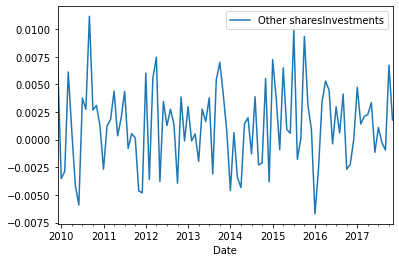

In [89]:
data.plot()

In [90]:
adfuller_test(data)

ADF Test Statistic : -6.297181557412899
p-value : 3.482721721564751e-08
#Lags Used : 3
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


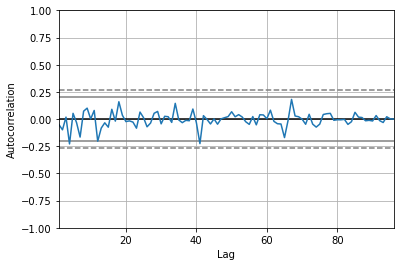

In [91]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

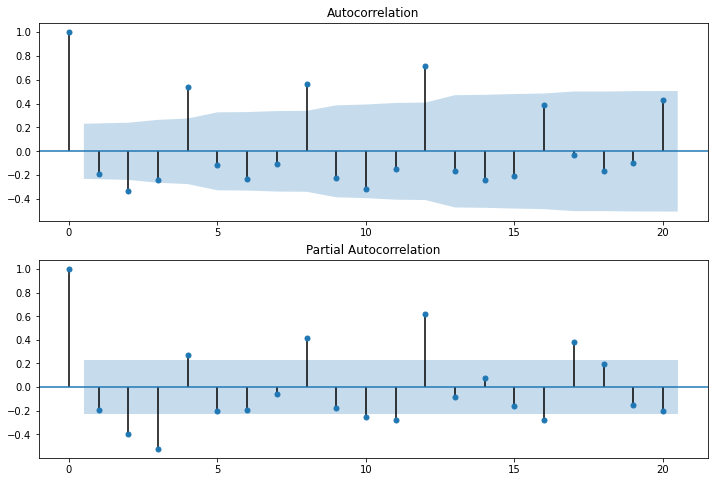

In [92]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = plot_acf(x_train,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train,lags=20,ax=ax2)

In [93]:
model=ARIMA(data,order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Other sharesInvestments   No. Observations:                   95
Model:                        ARIMA(1, 1, 0)   Log Likelihood                 374.829
Method:                              css-mle   S.D. of innovations              0.005
Date:                       Sat, 31 Oct 2020   AIC                           -743.658
Time:                               13:53:02   BIC                           -735.996
Sample:                           01-31-2010   HQIC                          -740.562
                                - 11-30-2017                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.011e-06      0.000     -0.003      0.998      -0.001       0.001
ar.L1.D.Other sharesInvestments    -0.4809      0.092     -5.236      0.000      -0.661      -0.301
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0792           +0.0000j            2.0792            0.5000
-----------------------------------------------------------------------------
"""

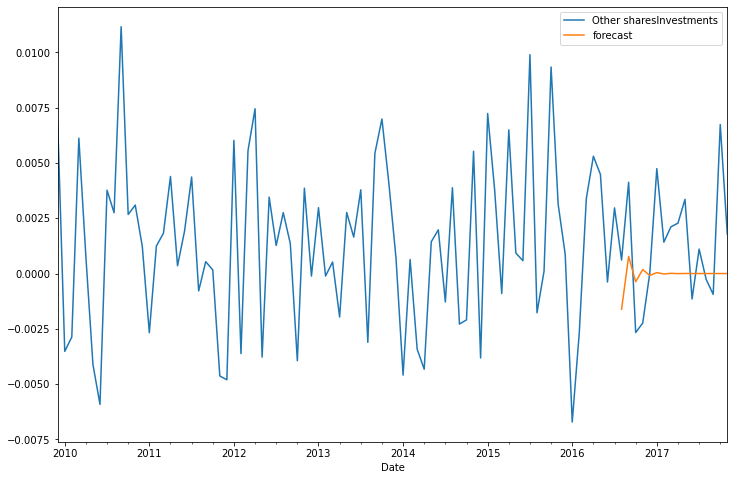

In [95]:
data['forecast']=model_fit.predict(start=80,end=96,dynamic=True)
data[['Other sharesInvestments','forecast']].plot(figsize=(12,8))

In [96]:
model=sm.tsa.statespace.SARIMAX(x_train,order=(1, 0,1),seasonal_order=(1,0,1,12)) #(p,d,q,Shift)
results=model.fit()

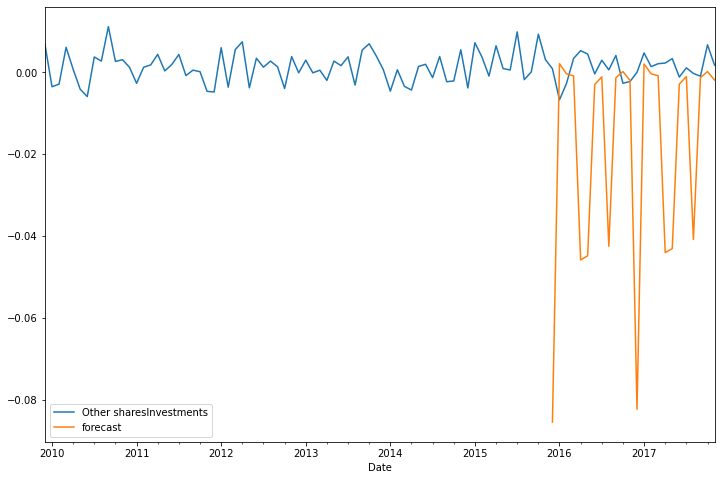

In [97]:
data['forecast']=results.predict(start=72,end=96,dynamic=True)
data[['Other sharesInvestments','forecast']].plot(figsize=(12,8))